In [5]:
import pandas as pd
import numpy as np
import seaborn as sns 
import math
import seaborn as sns
import matplotlib.pyplot as plt
import time as tm

In [8]:
data1 = pd.read_csv('magic04.csv', header=None)
data = np.array(data1)
X_gammas = data[0:12332,0:11]
index = np.arange(0, 12332-6688) 
X_gammas=np.delete(X_gammas,index,axis=0)#excess gamma data deleted
X_hadrons = data[12332:19020,0:11]
data_balanced = np.vstack((X_gammas,X_hadrons))#balanced data
np.random.shuffle(data_balanced)#shuffle data
X = data_balanced[:,0:10]
X = X.astype(float)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0) 
X_standardized = (X - X_mean) /  X_std #Standartized data
Y = np.reshape(data_balanced[:,10], (13376,1))
Y = np.where(Y == 'h', 0, 1) # 0 for hadron, 1 for gamma

In [11]:
def train_test_split(X, y, test_size):
    feature_eng1= np.hstack((X,X[:,1:2]*X[:,1:2]))
    feature_eng2= np.hstack((feature_eng1,X[:,3:4]*X[:,2:3]))
    feature_eng3= np.hstack((feature_eng2,X[:,1:2]*X[:,2:3]))
   
    num_test = int(len(X) * test_size)
    indices = np.random.permutation(len(X))
    
    test_indices = indices[:num_test]
    train_indices = indices[num_test:]

    X_train,X_test,y_train,y_test = X[train_indices],X[test_indices],y[train_indices],y[test_indices]
    X_mean = np.mean(X_train, axis=0)
    X_std = np.std(X_train, axis=0)
    X_train = (X_train - X_mean) /  X_std
    X_test  = (X_test - X_mean) /  X_std
    
    X_train2 = np.hstack((X_train,X_train[:,1:2]*X_train[:,1:2]))
    X_test2  = np.hstack((X_test,X_test[:,1:2]*X_test[:,1:2]))
    y_train2,y_test2 =  y[train_indices],y[test_indices]
    
    
    X_train3 = np.hstack((X_train2,X_train[:,3:4]*X_train[:,2:3]))
    X_test3  = np.hstack((X_test2,X_test[:,3:4]*X_test[:,2:3]))
    y_train3,y_test3 = y[train_indices],y[test_indices]
    
    X_train4 = np.hstack((X_train3,X_train[:,1:2]*X_train[:,2:3]))
    X_test4  = np.hstack((X_test3,X_test[:,1:2]*X_test[:,2:3]))
    y_train4,y_test4 = y[train_indices],y[test_indices]
    
    
    """X_train2,X_test2,y_train2,y_test2 =  feature_eng1[train_indices], feature_eng1[test_indices],y[train_indices],y[test_indices]
    X_mean2 = np.mean(X_train2, axis=0)
    X_std2 = np.std(X_train2, axis=0)
    X_train2 = (X_train2 - X_mean2) /  X_std2
    X_test2 = (X_test2 - X_mean2) /  X_std2"""
    
    """"X_train3,X_test3,y_train3,y_test3 = feature_eng2[train_indices],feature_eng2[test_indices],y[train_indices],y[test_indices]
    X_mean3 = np.mean(X_train3, axis=0)
    X_std3 = np.std(X_train3, axis=0)
    X_train3 = (X_train3 - X_mean3) /  X_std3
    X_test3 = (X_test3 - X_mean3) /    X_std3"""
    
    """"X_train4,X_test4,y_train4,y_test4 = feature_eng3[train_indices],feature_eng3[test_indices],y[train_indices],y[test_indices]
    X_mean4 = np.mean(X_train4, axis=0)
    X_std4 = np.std(X_train4, axis=0)
    X_train4 = (X_train4 - X_mean4) /  X_std4
    X_test4 = (X_test4 - X_mean4) /  X_std4"""
    
    return X_train, X_test, y_train, y_test, X_train2,X_test2,y_train2,y_test2, X_train3,X_test3,y_train3,y_test3,X_train4,X_test4,y_train4,y_test4

In [24]:
y_mean = np.mean(Y) 
scores = {} 
predictor_labels = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist'] 
for i in range(10):   
    x_i = X_standardized[:, i]   
    x_mean = np.mean(x_i)   
    
    numerator = np.sum(np.multiply((x_i - x_mean) , (Y.flatten() - y_mean))) 
    denominator = np.sqrt(np.sum((x_i - x_mean) ** 2) * np.sum((Y.flatten() - y_mean) ** 2)) 
 
    scores[f'Correlation between label and feature {predictor_labels[i]}'] = abs(numerator / denominator) 
sorted_feature_ranking = sorted(scores.items(), key=lambda item: item[1], reverse=True) 
sorted_feature_ranking 

[('Correlation between label and feature fAlpha', 0.46735330367662764),
 ('Correlation between label and feature fLength', 0.28785157154718544),
 ('Correlation between label and feature fWidth', 0.24509449368261527),
 ('Correlation between label and feature fM3Long', 0.18566625365785386),
 ('Correlation between label and feature fAsym', 0.1698489534953144),
 ('Correlation between label and feature fSize', 0.12018809200034211),
 ('Correlation between label and feature fDist', 0.06633923676111422),
 ('Correlation between label and feature fConc', 0.025625891961685972),
 ('Correlation between label and feature fConc1', 0.004675368684095842),
 ('Correlation between label and feature fM3Trans', 0.003953425771419972)]

In [32]:
def knn(X_train, y_train, X_test, k):
    diff = X_train - X_test #find the differences between x_instance and X_train datas
    distances = np.sqrt(np.sum(diff ** 2, axis=1))
    k_indices = np.argsort(distances)[:k] #choose the first smallest k distance 
    k_nearest_labels = y_train[k_indices] # find labels(0-1) for chosen indices
   
    gamma_probability = np.mean(k_nearest_labels) # probability of being class 1(gamma)
    
    return gamma_probability

In [7]:
def k_fold_cross_validation(X, y, k, num_folds, threshold):
    # k= nearest number of neighbor, num_folds= k_fold number
    fold_length = len(X) // num_folds
    accuracies = []
    all_y_pred = []
    all_accuracy=[]
    TP = TN = FP = FN = 0
    for i in range(num_folds):
        y_true = []
        start_row = i * fold_length
        end_row = (i + 1) * fold_length
        X_test = X[start_row:end_row]
        y_test = y[start_row:end_row]
        X_train = np.concatenate((X[:start_row], X[end_row:]))
        y_train = np.concatenate((y[:start_row], y[end_row:]))
        y_true.extend(y_test)
        y_pred = []
        for x_test_instance in X_test:
            prediction = knn(X_train, y_train, x_test_instance, k)
            if prediction >=threshold:#according to threshold give 1 or 0 to prediction 
                prediction=1
            else:
                prediction=0
            y_pred.append(prediction)
        accuracy=0
        tp = tn = fp = fn = 0
        for true, pred in zip(y_true, y_pred):
            if true == 1 and pred == 1:
                tp += 1
                TP += 1
            elif true == 0 and pred == 0:
                tn += 1
                TN += 1
            elif true == 0 and pred == 1:
                fp += 1
                FP += 1
            elif true == 1 and pred == 0:
                fn += 1
                FN += 1
        accuracy= 100*(tp+tn)/(tp+tn+fp+fn)#accuracy for each fold
        all_accuracy.append(accuracy) #all accuracies(mean will be desired result)
        conf_matrix = [[TN//100,FP//100], [FN//100, TP//100]]
        
    return  np.mean(all_accuracy),conf_matrix

In [34]:
def train_test_split_k_nearest(X_train, X_test, y_train, y_test, k, threshold):
    # k= nearest number of neighbor, num_folds= k_fold number
    all_accuracy=[]
    TP = TN = FP = FN = 0
    y_true = []
    y_pred = []
    y_true.extend(y_test)
    for x_test_instance in X_test:
        prediction = knn(X_train, y_train, x_test_instance, k)
        if prediction >=threshold:#according to threshold give 1 or 0 to prediction 
            prediction=1
        else:
            prediction=0
        y_pred.append(prediction)
    accuracy=0
    tp = tn = fp = fn = 0
    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:
            tp += 1
            TP += 1
        elif true == 0 and pred == 0:
            tn += 1
            TN += 1
        elif true == 0 and pred == 1:
            fp += 1
            FP += 1
        elif true == 1 and pred == 0:
            fn += 1
            FN += 1
    accuracy= 100*(tp+tn)/(tp+tn+fp+fn)#accuracy for each fold
    conf_matrix = [[TN//100,FP//100], [FN//100, TP//100]]
        
    return  np.mean(accuracy),conf_matrix

In [24]:
accuracies=[]
confusion_matrices=[]
for k in range(2,20):
    accuracy,confusion_matrix=k_fold_cross_validation(X_standardized, Y, k, 6,0.6)
    accuracies.append(accuracy)
    

In [ ]:
k_fold_cross_validation(X, y, k, num_folds, threshold)

In [26]:
accuracies2=[]
confusion_matrices2=[]
for i in np.arange(0.1, 1, 0.05):
    accuracy2,confusion_matrix2=k_fold_cross_validation(X_standardized, Y, 10, 6, i)
    accuracies2.append(accuracy2)
    

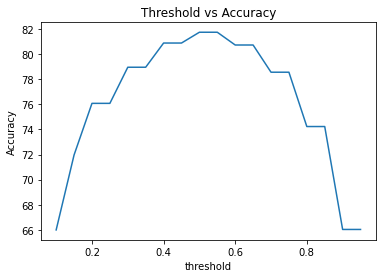

In [27]:
plt.plot([0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95],accuracies2)
plt.xlabel('threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.show()


In [34]:
accuracies2

[65.99371915657245,
 71.96799760729775,
 76.08045461342904,
 76.08045461342904,
 78.95917451772095,
 78.95917451772095,
 80.88829071332435,
 80.88829071332435,
 81.74816808733362,
 81.74816808733362,
 80.73126962763571,
 80.73126962763571,
 78.56288320622103,
 78.56288320622103,
 74.23358755794825,
 74.23358755794825,
 66.03110512935547,
 66.03110512935547]

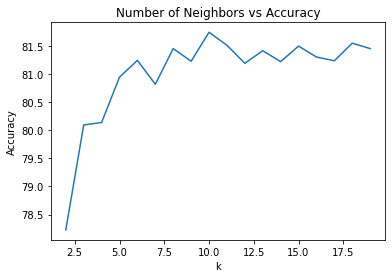

In [25]:
plt.plot([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],accuracies) 
plt.xlabel('k') 
plt.ylabel('Accuracy') 
plt.title('Number of Neighbors vs Accuracy') 
plt.show() 

In [21]:
def SVM(learning_rate, lambd, n_iterations, X_train, y_train):
    w = np.zeros(X_train.shape[1]) # initialize weight vector 
    b = 0
    y_modified = np.where(y_train <= 0, -1, 1) #change labels 0 to -1, 1 is still 1
   
    for _ in range(n_iterations):#update weight vector and b 
        for i, x in enumerate(X_train):

            margin = y_modified[i] * (np.dot(x, w) - b)>= 1 #this are the derivative of cost function 
            if margin:
                w -= learning_rate*(2*lambd*w)
            else:
                w -= learning_rate*(2*lambd*w-x*y_modified[i])
                b -= learning_rate*y_modified[i]
    return w,b
   

In [11]:
def k_fold_cross_validation_SVM(X, y, num_folds,regularization_param,learning_rate,num_of_iterations):
    fold_size = len(X) // num_folds
    accuracies = []
    all_y_pred = []
    all_y_true = []
       
    for i in range(num_folds):
        start_index = i * fold_size
        end_index = (i + 1) * fold_size if i != num_folds - 1 else len(X)
        X_test = X[start_index:end_index]
        y_test = y[start_index:end_index]
        X_train = np.concatenate((X[:start_index], X[end_index:]))
        y_train = np.concatenate((y[:start_index], y[end_index:]))
        
        y_pred = []
        w,b= SVM(learning_rate, regularization_param, num_of_iterations,X_train,y_train)
        for x_test_instance in X_test:
            predict = np.sign(np.dot(x_test_instance, w) - b)
            if predict ==-1:
                prediction=0
                
            else:
                prediction=1
                
            y_pred.append(prediction)

        all_y_pred.extend(y_pred)
        all_y_true.extend(y_test)

    tp = tn = fp = fn = 0
    for true, pred in zip(all_y_true, all_y_pred):
        if true == 1 and pred == 1:
            tp += 1
            
        if true == 0 and pred == 0:
            tn += 1
            
        if true == 0 and pred == 1:
            fp += 1
            
        if true == 1 and pred == 0:
            fn += 1
            
    accuracy= 100*(tp+tn)/(tp+tn+fp+fn)
    conf_matrix = [[tn//num_folds, fp//num_folds], [fn//num_folds, tp//num_folds]]
    return conf_matrix, accuracy

In [22]:
def train_test_split__SVM(X_train, X_test, y_train, y_test,regularization_param,learning_rate,num_of_iterations):
    
    all_y_pred = []
    all_y_true = []
    all_y_true.extend(y_test)   
    y_pred = []
    w,b= SVM(learning_rate, regularization_param, num_of_iterations,X_train,y_train)
    for x_test_instance in X_test:
        predict = np.sign(np.dot(x_test_instance, w) - b)
        if predict ==-1:
            prediction=0
        else:
            prediction=1
        y_pred.append(prediction)

    all_y_pred.extend(y_pred)
        

    tp = tn = fp = fn = 0
    for true, pred in zip(all_y_true, all_y_pred):
        if true == 1 and pred == 1:
            tp += 1
            
        if true == 0 and pred == 0:
            tn += 1
            
        if true == 0 and pred == 1:
            fp += 1
            
        if true == 1 and pred == 0:
            fn += 1
            
    accuracy= 100*(tp+tn)/(tp+tn+fp+fn)
    conf_matrix = [[tn, fp], [fn, tp]]
    return conf_matrix, accuracy

In [52]:
accuracies3=[]
confusion_matrices3=[]
values = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

for lambd in values:
    confusion_matrix,accuracy=k_fold_cross_validation_SVM(X_standardized, Y, 3,lambd,0.0001,50)
    accuracies3.append(accuracy)
    

In [54]:
accuracies4=[]
confusion_matrices4=[]
values2 = [0.000001, 0.00001, 0.00003, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01]

for i in values2:
    confusion_matrix,accuracy=k_fold_cross_validation_SVM(X_standardized, Y, 3,0.0001,i,50)
    accuracies4.append(accuracy)
    

In [56]:
accuracies5=[]
confusion_matrices5=[]
values3 = [int(10), int(20), int(30), int(40), int(50), int(60), int(70), int(80), int(90),int(100),int(150),int(200)]

for i in values3:
    confusion_matrix,accuracy=k_fold_cross_validation_SVM(X_standardized, Y, 3,0.0001,0.0001,i)
    accuracies5.append(accuracy)
    

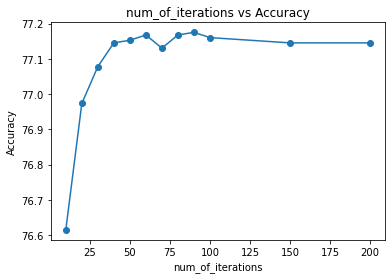

In [57]:
plt.plot(values3,accuracies5,marker='o')
 
plt.xlabel('num_of_iterations')
plt.ylabel('Accuracy')
plt.title('num_of_iterations vs Accuracy')
plt.show()

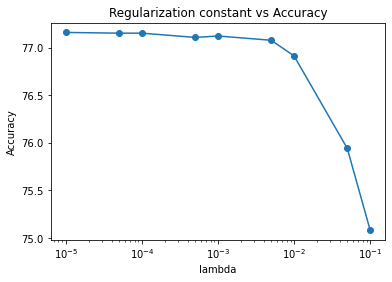

In [53]:
plt.plot(values,accuracies3,marker='o')
plt.xscale('log')  
plt.xlabel('lambda')
plt.ylabel('Accuracy')
plt.title('Regularization constant vs Accuracy')
plt.show()

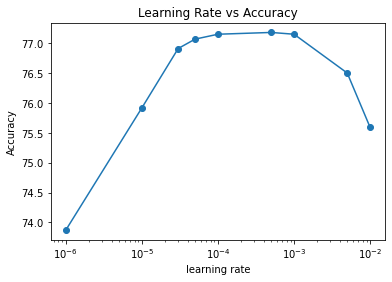

In [55]:
plt.plot(values2,accuracies4,marker='o')
plt.xscale('log')  
plt.xlabel('learning rate')
plt.ylabel('Accuracy')
plt.title('Learning Rate vs Accuracy')
plt.show()

In [14]:
def test_neural_network(feature_train, feature_test, label_train, label_test):

    ild = feature_train.shape[1] #Input layer dimension 
    sld = 30 #Second layer dimension
    tld = 30 #Third layer dimension
    old = 1 #Output layer dimension
    
    k = 100 #Batch Size
    l = 20 #Training session over train data
    
    m = feature_train.shape[0]
    
    batch_length = int(m/k)
    spare = m % batch_length
    
    feauture_train = feature_train[:m-spare]
    label_train = label_train[:m-spare]
    
    feauture_train_batched = np.empty((k, batch_length, feauture_train.shape[1]), dtype=feauture_train.dtype)
    label_train_batched = np.empty((k, batch_length, label_test.shape[1]), dtype=label_train.dtype)
    
    learning_rate = 1.0/k
    
    start_limit = 0.1
    
    slw = np.random.uniform(-start_limit,start_limit,(sld,ild)) #Input layer to second layer weights
    tlw = np.random.uniform(-start_limit,start_limit,(tld,sld)) #Second layer to third layer weihhts
    olw = np.random.uniform(-start_limit,start_limit,(old,tld)) #Third layer to output layer weights
    
    decision_boundary = 0.5
    
    g_slw = np.zeros(slw.shape)
    g_tlw = np.zeros(tlw.shape)
    g_olw = np.zeros(olw.shape)
    
    def relu(x):
        return np.maximum(x, 0)
    
    def relu_derivative(x):
        return np.where(x >= 0, 1, 0)
    
    logistic_limit = 10.0
    
    def logistic(v):
        v = np.clip(v,-logistic_limit, logistic_limit)
        return 1/(1+np.exp(-v))
    
    def logistic_derivative(v):
        return logistic(v) * (1 - logistic(v))
    
    def loss_function_derivative(y_label,y_pred):
        #Square loss function assumed
        return -2.0 * (y_label - y_pred)
        
    def compute_prediction(input_vector):
        second_layer_values = relu(np.dot(slw,input_vector))
        third_layer_values = relu(np.dot(tlw,second_layer_values))
        output_layer_value = logistic(np.dot(olw,third_layer_values))
        return output_layer_value
    
    
    def binary_prediction(input_vector):
        return (compute_prediction(input_vector) >= decision_boundary).astype(int)
      
    
    def compute_batch_gradient(input_vector,y_label):
        # input_vector = input_vector.reshape(-1,1)
        v_sl = np.dot(slw,input_vector) #induced local field of second layer
        second_layer_values = relu(v_sl)
        v_tl = np.dot(tlw,second_layer_values) #induced local field of third layer
        third_layer_values = relu(v_tl)
        v_ol = np.dot(olw,third_layer_values) #induced local field of output layer
        y_pred = logistic(v_ol)
        
        d_ol = -loss_function_derivative(y_label, y_pred) * logistic_derivative(v_ol) #delta of output layer
        sg_olw =  np.dot(-d_ol, third_layer_values.T) #gradient for output layer weights
        
        d_tl = d_ol * np.multiply(olw.T,relu_derivative(v_tl)) #delta of third layer
        sg_tlw = np.dot(-d_tl,second_layer_values.T) # gradient for third layer weights
        
        d_sl = np.dot(tlw.T,d_tl)*relu_derivative(v_sl)
        sg_slw = np.dot(-d_sl, input_vector.T) #gradient for second layer weights
        
        return sg_olw,sg_tlw,sg_slw
        
    #Slice the data into mini batches
    for i in range(k):
        start_row = i * batch_length
        end_row = (i + 1) * batch_length
        feauture_train_batched[i] = feature_train[start_row:end_row, :]
        label_train_batched[i] = label_train[start_row:end_row, :]

    CF = np.zeros((2,2)) #Confusion Matrix

    for n in range(l):
        for j in range(k): #Train Gradient descent
            g_olw,g_tlw,g_slw = compute_batch_gradient(feauture_train_batched[j,:,:].T, label_train_batched[j,:,:].T)
            olw = olw - learning_rate * g_olw
            tlw = tlw - learning_rate * g_tlw
            slw = slw - learning_rate * g_slw
            
    y_pred = binary_prediction(feature_test.T)
    y_label =label_test.T
    
    #Confusion Matrix
    FN = (1-y_pred) * y_label
    TN = (1-y_pred) * (1 - y_label)
    FP = y_pred * (1 - y_label)
    TP = y_pred * y_label
    
    CF[0,0] += np.sum(TN)
    CF[0,1] += np.sum(FP)
    CF[1,0] += np.sum(FN)
    CF[1,1] += np.sum(TP)
    
    y_accuracy = y_pred == y_label
    accuracy = 100*np.sum(y_accuracy)/y_accuracy.shape[1]
    
    return accuracy



In [52]:
X_train, X_test, y_train, y_test, X_train2,X_test2,y_train2,y_test2, X_train3,X_test3,y_train3,y_test3,X_train4,X_test4,y_train4,y_test4= train_test_split(X, Y, 0.2)

In [40]:
start_time = tm.time()
nn_accuracy_normal_data = test_neural_network(X_train, X_test, y_train, y_test)
print(nn_accuracy_normal_data)
end_time = tm.time()
print("Execution Time: {:.2f}s".format(end_time - start_time))

85.7196261682243
Execution Time: 0.28s


In [41]:
start_time = tm.time()
nn_accuracy_feature_engineered_1 = test_neural_network(X_train2, X_test2, y_train2, y_test2)
print(nn_accuracy_feature_engineered_1)
end_time = tm.time()
print("Execution Time: {:.2f}s".format(end_time - start_time))

85.86915887850468
Execution Time: 0.30s


In [42]:
start_time = tm.time()
nn_accuracy_feature_engineered_2 = test_neural_network(X_train3, X_test3, y_train3, y_test3)
print(nn_accuracy_feature_engineered_2)
end_time = tm.time()
print("Execution Time: {:.2f}s".format(end_time - start_time))

85.1214953271028
Execution Time: 0.30s


In [43]:
start_time = tm.time()
nn_accuracy_feature_engineered_3 = test_neural_network(X_train4, X_test4, y_train4, y_test4)
print(nn_accuracy_feature_engineered_3)
end_time = tm.time()
print("Execution Time: {:.2f}s".format(end_time - start_time))

85.64485981308411
Execution Time: 0.31s


In [44]:
start_time = tm.time()
confsion_matrix_SVM,accuracy_SVM= train_test_split__SVM(X_train, X_test, y_train, y_test,0.0001,0.0001,50)
print(accuracy_SVM)
end_time = tm.time()
print("Execution Time: {:.2f}s".format(end_time - start_time))

77.94392523364486
Execution Time: 4.26s


In [45]:
start_time = tm.time()
confsion_matrix_SVM2,accuracy_SVM2= train_test_split__SVM(X_train2, X_test2, y_train2, y_test2,0.0001,0.0001,50)
print(accuracy_SVM2)
end_time = tm.time()
print("Execution Time: {:.2f}s".format(end_time - start_time))

78.72897196261682
Execution Time: 4.33s


In [46]:
start_time = tm.time()
confsion_matrix_SVM3,accuracy_SVM3= train_test_split__SVM(X_train3, X_test3, y_train3, y_test3,0.0001,0.0001,50)
print(accuracy_SVM3)
end_time = tm.time()
print("Execution Time: {:.2f}s".format(end_time - start_time))  

81.75700934579439
Execution Time: 4.19s


In [47]:
start_time = tm.time()
confsion_matrix_SVM6,accuracy_SVM6= train_test_split__SVM(X_train4, X_test4, y_train4, y_test4,0.0001,0.0001,50)
print(accuracy_SVM6)
end_time = tm.time()
print("Execution Time: {:.2f}s".format(end_time - start_time))

81.90654205607477
Execution Time: 4.30s


In [48]:
start_time = tm.time()
accurcy,all_confusion_matrix=train_test_split_k_nearest(X_train, X_test, y_train, y_test,6,0.55)
print(accurcy)
end_time = tm.time()
print("Execution Time: {:.2f}s".format(end_time - start_time))

82.01869158878505
Execution Time: 2.15s


In [49]:
start_time = tm.time()
accurcy,all_confusion_matrix=train_test_split_k_nearest(X_train2, X_test2, y_train2, y_test2,6,0.55)
print(accurcy)
end_time = tm.time()
print("Execution Time: {:.2f}s".format(end_time - start_time))

82.54205607476635
Execution Time: 2.11s


In [53]:
start_time = tm.time()
accurcy,all_confusion_matrix=train_test_split_k_nearest(X_train3, X_test3, y_train3, y_test3,6,0.55)
print(accurcy)
end_time = tm.time()
print("Execution Time: {:.2f}s".format(end_time - start_time))

82.09345794392523
Execution Time: 2.14s


In [54]:
start_time = tm.time()
accurcy,all_confusion_matrix=train_test_split_k_nearest(X_train4, X_test4, y_train4, y_test4,6,0.55)
print(accurcy)
end_time = tm.time()
print("Execution Time: {:.2f}s".format(end_time - start_time))

82.13084112149532
Execution Time: 3.12s
